<a href="https://colab.research.google.com/github/gIheb/data/blob/master/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math
wine = datasets.load_wine()
#print(wine.DESCR)
print(len(wine.data))
print(len(wine.data[0]))

178
13


Text(0.5, 1.0, 'Sepal size distribution')

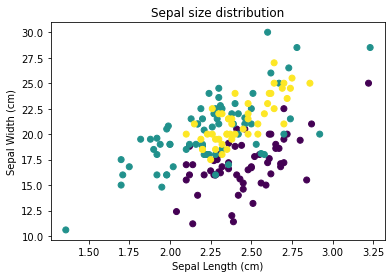

In [2]:
# Select all rows and only first two columns (sepal length/width)
X = wine.data[:,2:4]

# Target will be used to plot samples in different colors for different species
Y = wine.target

plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal size distribution')



In [0]:
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return sigmoid(result)

def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

In [0]:
num_features = wine.data.shape[1]

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0

  global bias, weights

  m = len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

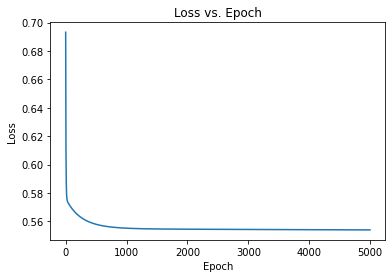

In [17]:
# Model will "learn" values for the weights and biases

weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.4

epochs = 5000
x_train_samples = wine.data / wine.data.max()
y_train_samples = [1 if y == 2 else 0 for y in wine.target]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

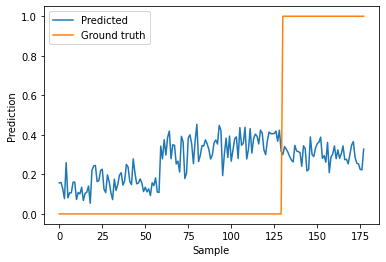

Accuracy: 73.03 %


In [18]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))